In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


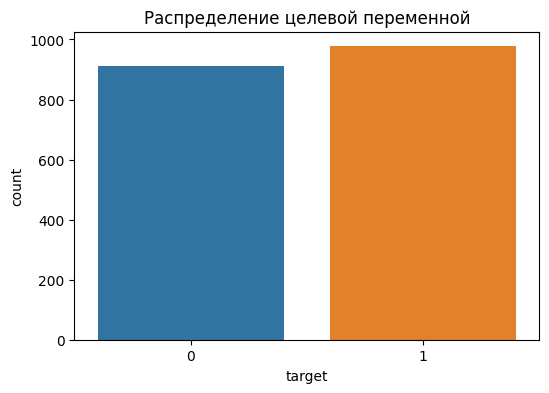

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [6]:
random_state = 42
target = 'target'

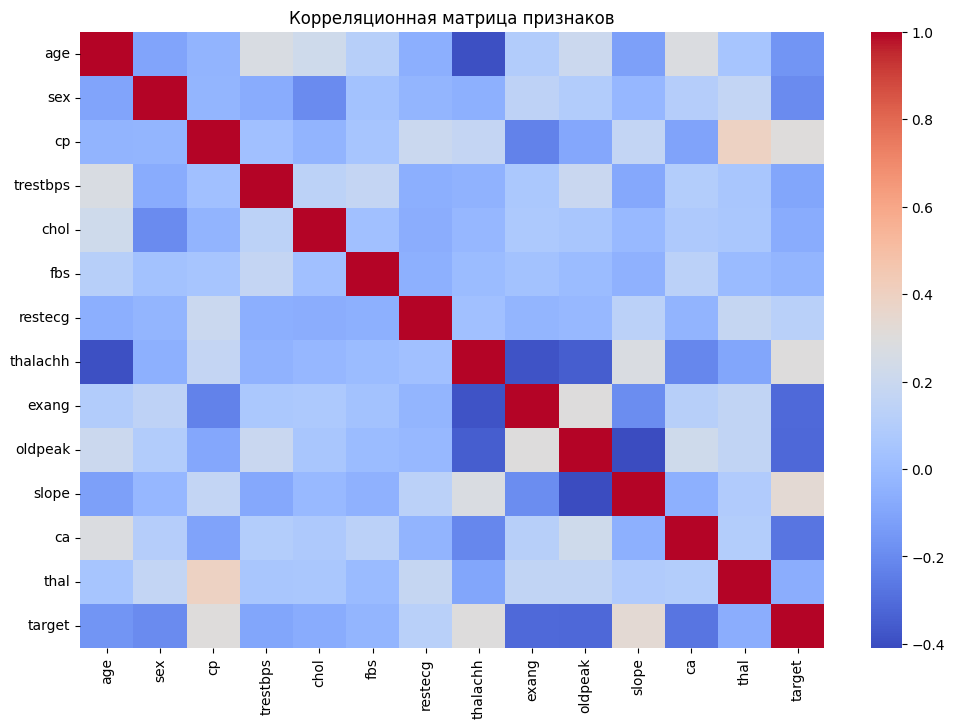

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', )
plt.title("Корреляционная матрица признаков")
plt.show()

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=random_state)
train, val = train_test_split(train, test_size=0.25, random_state=random_state)

In [9]:
train.to_parquet('train.parquet')
test.to_parquet('test.parquet')
val.to_parquet('val.parquet')

# FIRST

In [2]:
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

In [3]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
1398,47,1,3,108,243,0,0,152,0,0.0,1,0,3,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
472,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,59,1,1,170,288,0,2,159,0,0.2,2,0,7,1
1306,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1032,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
1839,70,0,2,160,269,0,1,112,1,2.9,1,1,3,0


In [11]:
model = LogisticRegression()
model.fit(train.drop(columns=target), train[target])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=[target]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=[target]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=[target]))[:, 1])}")

TRAIN : 0.8338228677132287
VAL : 0.8035749472202675
TEST : 0.7923012318029116


In [13]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=[target])))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=[target])))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=[target])))}")

TRAIN : 0.7935222672064778
VAL : 0.7632183908045977
TEST : 0.7559808612440191


In [14]:
y_pred = model.predict(test.drop(columns=[target]))

accuracy = accuracy_score(test[target], y_pred)
precision = precision_score(test[target], y_pred)
recall = recall_score(test[target], y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.73
Precision: 0.69
Recall: 0.83


In [15]:
feature_importance = model.coef_[0]

feature_names = test.drop(columns=[target]).columns
importance_table = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_table)

     Feature  Importance
10     slope    0.987115
2         cp    0.500379
6    restecg    0.250922
7   thalachh    0.011186
4       chol   -0.002949
0        age   -0.004703
3   trestbps   -0.007903
5        fbs   -0.024309
9    oldpeak   -0.115326
12      thal   -0.200295
11        ca   -0.460579
8      exang   -0.684581
1        sex   -0.764002


In [16]:
train = train.drop(columns = ['sex', 'exang', 'ca', 'thal', 'oldpeak', 'fbs', 'trestbps', 'age', 'chol'])
val = val.drop(columns = ['sex', 'exang', 'ca', 'thal', 'oldpeak', 'fbs', 'trestbps', 'age', 'chol'])
test = test.drop(columns = ['sex', 'exang', 'ca', 'thal', 'oldpeak', 'fbs', 'trestbps', 'age', 'chol'])

In [17]:
model = LogisticRegression()
model.fit(train.drop(columns=target), train[target])

LogisticRegression()

In [18]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=[target]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=[target]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=[target]))[:, 1])}")

TRAIN : 0.7818452529747026
VAL : 0.7347642505277974
TEST : 0.7517357222844345


In [19]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=[target])))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=[target])))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=[target])))}")

TRAIN : 0.7367563162184189
VAL : 0.7129629629629629
TEST : 0.7024390243902439


In [20]:
y_pred = model.predict(test.drop(columns=[target]))

accuracy = accuracy_score(test[target], y_pred)
precision = precision_score(test[target], y_pred)
recall = recall_score(test[target], y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.68
Precision: 0.65
Recall: 0.76


# THIRD

In [28]:
x_train = train.drop(columns=target)
y_train = train[target]

x_val = val.drop(columns=target)
y_val = val[target]

x_test = test.drop(columns=target)
y_test = test[target]

In [29]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
val_scaled = scaler.transform(x_val)
test_scaled = scaler.transform(x_test)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(train_scaled)
x_val_poly = poly.transform(val_scaled)
x_test_poly = poly.transform(test_scaled)

In [30]:
model = LogisticRegression()
model.fit(x_train_poly, train[target])

LogisticRegression()

In [31]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(x_train_poly)[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(x_val_poly)[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(x_test_poly)[:, 1])}")

TRAIN : 0.9702967203279673
VAL : 0.9199155524278678
TEST : 0.9020996640537514


In [32]:
print(f"TRAIN : {f1_score(train[target], model.predict(x_train_poly))}")
print(f"VAL : {f1_score(val[target], model.predict(x_val_poly))}")
print(f"TEST : {f1_score(test[target], model.predict(x_test_poly))}")

TRAIN : 0.915
VAL : 0.8687350835322196
TEST : 0.8393782383419689


In [33]:
y_pred = model.predict(x_test_poly)

accuracy = accuracy_score(test[target], y_pred)
precision = precision_score(test[target], y_pred)
recall = recall_score(test[target], y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.84
Precision: 0.83
Recall: 0.85
